In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

#Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(len(outcomes), dtype = int))
print (accuracy_score(outcomes[:], predictions))

Predictions have an accuracy of 38.38%.


In [26]:
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 38.38%.


In [27]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


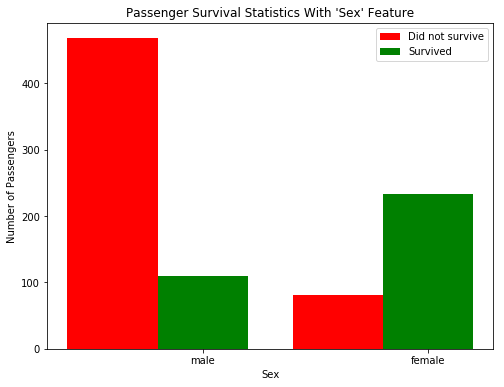

In [32]:
vs.survival_stats(data, outcomes, 'Sex')

In [37]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        #if sex = female survive , male not
        if passenger['Sex'] == 'male':

    
             predictions.append(0)

        else:
            predictions.append(1)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
print (accuracy_score(outcomes, predictions))


Predictions have an accuracy of 78.68%.


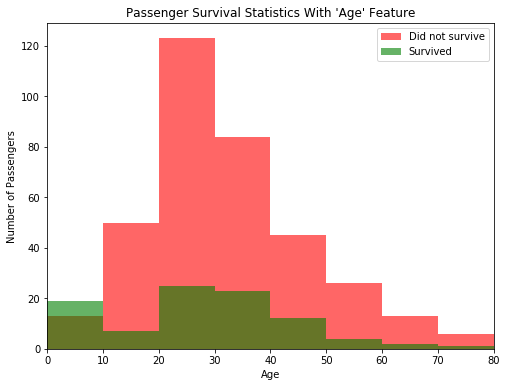

In [38]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [59]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # male , <10 = 1 
        #male , > 10 = 0
        #female = 1
        if passenger['Sex'] == 'female':

                predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)


    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)
print (accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


# some suggested features >> Pclass, Sex, Age, SibSp, and Parch  
#ex : vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

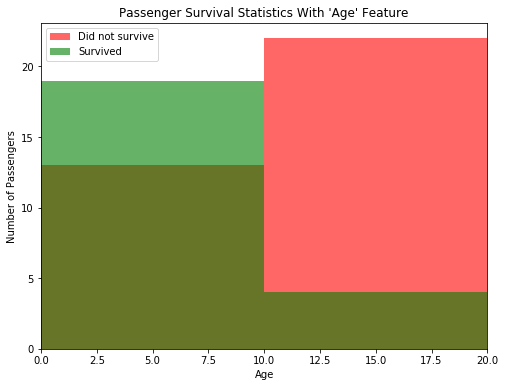

In [65]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

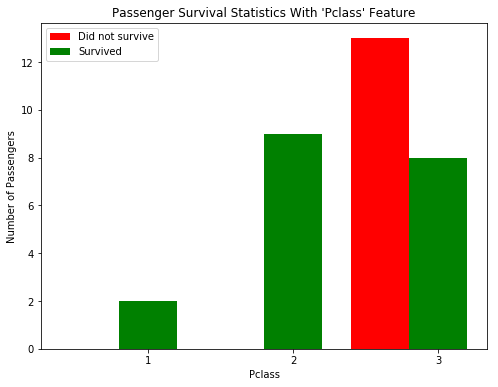

In [73]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "Age < 10" ]) 
#pclass =1,2 all survive male & <10 

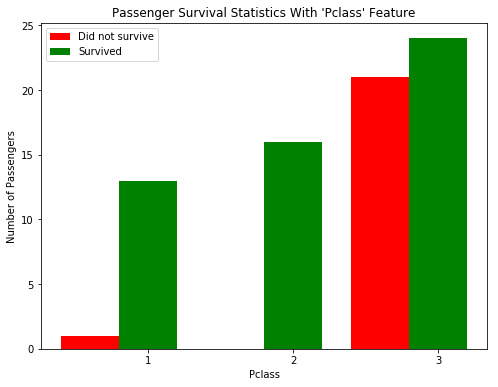

In [77]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'", "Age < 18" ]) 
#most of class 2,1 survive

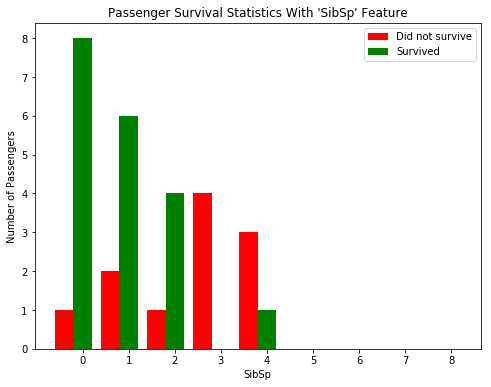

In [90]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", "Age < 10" ]) 
#majorty female passengers with 0,1 siblings survive  

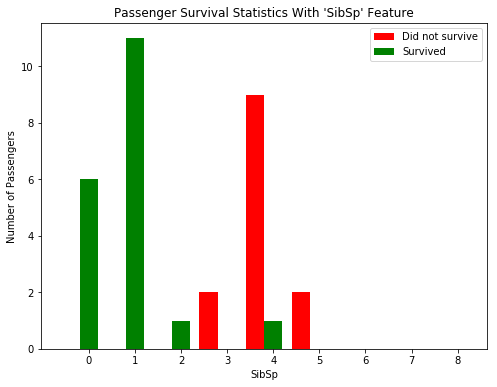

In [89]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'", "Age < 10" ])
#all of males <10 and has 0, 1 or 2 sibinlgs survive 

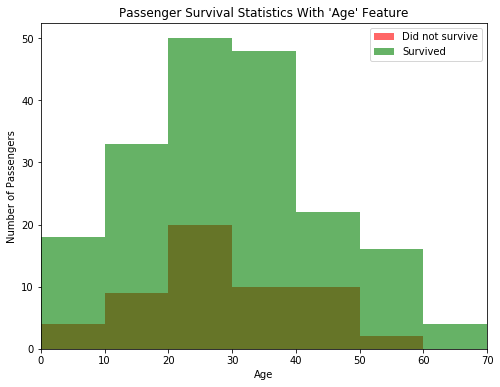

In [97]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "SibSp < 3" ])
#female with SibSp <3 survive 

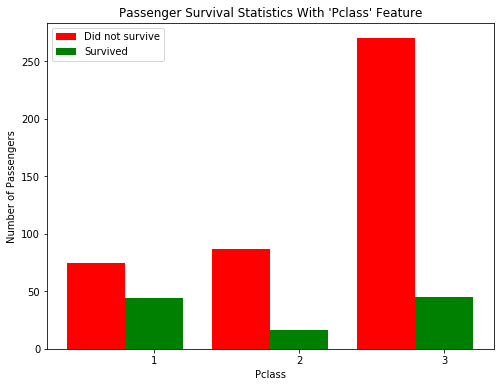

In [98]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "SibSp < 2" ])

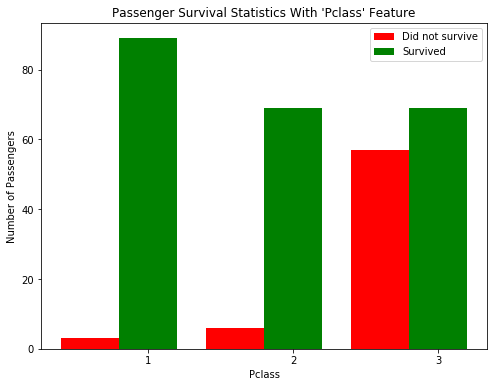

In [100]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'", "SibSp < 3" ])